# 1. Google Play Store uygulamalarÄ± ve incelemeleri
* Mobil uygulamalar oluÅŸturma kolaylÄ±ÄŸÄ± ve yÃ¼ksek kazanÃ§larÄ± nedeniyle popÃ¼lerdir.
* UygulamalarÄ± karÅŸÄ±laÅŸtÄ±rarak kapsamlÄ± bir analiz yapÄ±lacak.
* Veri setleri;
    * <code>apps.csv</code>: Google Play'deki uygulamalarÄ±n tamamÄ±nÄ± iÃ§erir. 13 tane deÄŸiÅŸken bulunur.
    * <code>user_reviews</code>: Her uygulama iÃ§in en Ã§ok yardÄ±mcÄ± olan 100 inceleme iÃ§erir. Ä°ncelemeler iÅŸlenmiÅŸ ve Ã¼Ã§ yeni Ã¶zellikle iliÅŸkilendirilmiÅŸtir: Sentiment (duygu - Positive, Negarive or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [5]:
# Veri setini oku
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Yinelenen deÄŸerleri at
apps = apps_with_duplicates.drop_duplicates()

# Toplam uygulama sayÄ±sÄ±nÄ± yazdÄ±r
print(f"Toplam uygulama sayÄ±sÄ±: {apps.shape[0]}")

# Ä°lk 5 satÄ±rÄ± inceleme
apps.head()

Toplam uygulama sayÄ±sÄ±: 9659


Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite â€“ FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  January 15, 2018   
2       Everyone               Art & Design    August 1, 2018   
3           Teen               Art & Design      June 8, 2018   
4       Everyone    Art & Design;Creativity     June 20, 2018   

          Current Ver   Android Ver  
0               1.0.0  4.0.3 and up  
1               2.0.0  4.0.3 and up  
2               1.2.4  4.0.3 and up  
3  Varies with device    4.2 and up  
4                 1.1    4.4 and up

# 2. Data cleaning (Veri temizleme)
* Veri temizleme, herhangi bir veri bilimi projesinin en temel alt gÃ¶revlerinden biridir. Ã‡ok sÄ±kÄ±cÄ± bir sÃ¼reÃ§ olsa da, deÄŸeri asla kÃ¼Ã§Ã¼msenmemelidir.
* Veri setindeki Installs ve Price gibi sÃ¼tunlar Ã¶zel karakter iÃ§ermeleri sebebiyle matematik hesaplamalarda kullanÄ±lmayÄ± zorlaÅŸtÄ±rÄ±r. Ä°deal olarak bu sÃ¼tunlarÄ±n sadece 0-9 arasÄ±ndaki rakamlarÄ± iÃ§ermesi istenir.
* Bu verilerin temizlenmesi gerekir.

In [6]:
# AtÄ±lacak karakterlerin listesi
chars_to_remove = ["+", ",", "$"]
# Temizlenecek sÃ¼tunlarÄ±n listesi
cols_to_clean = ["Installs", "Price"]

# Her bir sÃ¼tunu temizlemek iÃ§in dÃ¶ngÃ¼
for col in cols_to_clean:
    # Silinecek her bir karakter iÃ§in dÃ¶ngÃ¼
    for char in chars_to_remove:
        # Karakterlerin boÅŸ stringler ile deÄŸiÅŸtirilmesi
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
        
# Veri seti hakkÄ±nda bilgi
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


# 3. Veri tÃ¼rlerini dÃ¼zeltme
* Ã–zel karakterlerini Ã§Ä±kardÄ±ÄŸÄ±mÄ±z sÃ¼tunlarÄ± nÃ¼merik deÄŸiÅŸkene dÃ¶nÃ¼ÅŸtÃ¼rmemiz gerekir.
* En Ã§ok Ã§alÄ±ÅŸÄ±lacak sÃ¼tunlar Installs, Size, Rating ve Price.

In [7]:
import numpy as np

# Installs'Ä±n veri tipini float yapma
apps["Installs"] = apps["Installs"].astype("float")

# Price'Ä±n veri tipini float yapma
apps["Price"] = apps["Price"].astype("float")

# SÃ¼tunlarÄ±n veri tipine bakma
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 4. Uygulama kategorilerini keÅŸfetme
* Pazarda en yÃ¼ksek uygulama payÄ± hangi kategoride?
* Piyasaya hakim belirli bir kategori var mÄ±?
* Hangi kategorilerde en az sayÄ±da uygulama var?

* 33 benzersiz uygulama kategorisi var. Family ile Game uygulamalarÄ± en yÃ¼ksek pazar yaygÄ±nlÄ±ÄŸÄ±na sahip. Tools, Business ve Medical uygulamalar da Ã¼stlerde yer alÄ±yor.

In [8]:
import plotly
plotly.offline.init_notebook_mode(connected = True)
import plotly.graph_objs as go

# Toplam benzersiz kategori sayÄ±sÄ±
num_categories = len(apps["Category"].unique())
print(f"Kategori sayÄ±sÄ±: {num_categories}")

# Her kategorideki ugulama sayÄ±sÄ±
num_apps_in_category = apps["Category"].value_counts()

# Kategorileri azalan sÄ±raya gÃ¶re sÄ±rala
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Kategori sayÄ±sÄ±: 33


# 5. Uygulama puanlarÄ±nÄ±n daÄŸÄ±lÄ±mÄ±
* UygulamalarÄ±n ortalama puanlarÄ±nÄ± hesapla.
* Derecelendirmeler, bir uygulamanÄ±n temel performans gÃ¶stergesidir.
* UygulamalarÄ±n ortalama puanÄ± 4.17'dir. Histogram grafiÄŸi uygulamalarÄ±n istisnalar dÄ±ÅŸÄ±nda yÃ¼ksek puan aldÄ±ÄŸÄ±nÄ± gÃ¶sterir.

In [9]:
# UygulamalarÄ±n ortalama puanÄ±
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# UygulamalarÄ±n puanlarÄ±na gÃ¶re daÄŸÄ±lÄ±mÄ±
data = [go.Histogram(
        x = apps['Rating']
)]

# Ortalama uygulama derecelendirmesini belirtmek iÃ§in dikey kesikli Ã§izgi
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


# 6. Bir uygulamanÄ±n boyutu ve fiyatÄ±
* Mobil uygulamanÄ±n boyutu fazlaysa kullanÄ±cÄ±larÄ±n indirmesi zor ve/veya pahlÄ± olabilir. Uzun indirme sÃ¼releri uygulamanÄ±n indirilmemesine sebep olabilir. 
* Fiyat olarak bazÄ± kullanÄ±cÄ±lar uygulamalarÄ±n Ã¼cretsiz veya ucuz olmasÄ±nÄ± bekler. Hedef dÃ¼nya pazarÄ± ise bu sorunlar daha da artar. Ä°nternet hÄ±zlarÄ±, alÄ±m gÃ¼cÃ¼ ve dÃ¶viz kurlarÄ± nedeniyle.
* UygulamayÄ± boyutlandÄ±rmak ve fiyatlandÄ±rmak iÃ§in etkili bir ÅŸekilde nasÄ±l stratejiler bulunabilir?
    * Bir uygulamanÄ±n boyutu, derecelendirmesini etkiler mi?
    * KullanÄ±cÄ±lar sistem aÄŸÄ±rlÄ±klÄ± uygulamalarÄ± gerÃ§ekten Ã¶nemsiyor mu yoksa hafif aÄŸÄ±rlÄ±klÄ± uygulamalarÄ± mÄ± tercih ediyorlar?
    * Bir uygulamanÄ±n fiyatÄ±, derecelendirmesini etkiler mi?
    * KullanÄ±cÄ±lar her zaman Ã¼cretli uygulamalar yerine Ã¼cretsiz uygulamalarÄ± mÄ± tercih eder?
* En Ã§ok oy alan uygulamalarÄ±n (4'Ã¼n Ã¼zerinde puan alan) Ã§oÄŸunluÄŸunun 2 MB ile 20 MB arasÄ±nda deÄŸiÅŸtiÄŸi gÃ¶rÃ¼lÃ¼r. AyrÄ±ca uygulamalarÄ±n Ã§oÄŸu 10 dolarÄ±n altÄ±nda fiyatlandÄ±rÄ±lmÄ±ÅŸtÄ±r.

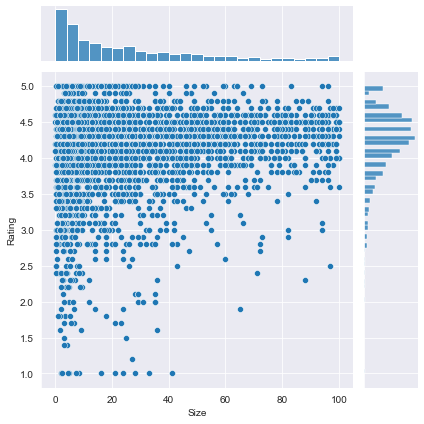

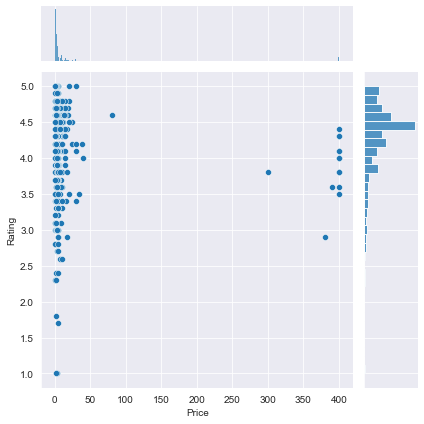

In [10]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Rating ve Size sÃ¼tunlarÄ±ndan her ikisinin de boÅŸ olmadÄ±ÄŸÄ± deÄŸerleri getir.
apps_with_size_and_rating_present = apps[(~apps["Rating"].isnull()) & (~apps["Size"].isnull())]

# 250den fazla uygulamaya sahip kategoriler iÃ§in
large_categories = apps_with_size_and_rating_present.groupby(["Category"]).filter(lambda x: len(x) >= 250)

# Size vs Rating grafiÄŸi
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])

# TÃ¼rÃ¼ Ã¼cretli olan uygulamalar seÃ§iliyor.
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

# 7. Uygulama kategorisi ve uygulama fiyatÄ± arasÄ±ndaki iliÅŸki
* Åžirketler ve geliÅŸtiriciler nasÄ±l geÃ§inecek? Åžirketler karÄ± maksimize etmek iÃ§in hangi para kazanma stratejilerini kullanabilir? UygulamalarÄ±n maliyetleri bÃ¼yÃ¼k Ã¶lÃ§Ã¼de Ã¶zelliklere, karmaÅŸÄ±klÄ±ÄŸa ve platforma baÄŸlÄ±dÄ±r.
* Uygulama iÃ§in doÄŸru fiyatlandÄ±rma yapmak iÃ§in birÃ§ok fark faktÃ¶r vardÄ±r. MÃ¼ÅŸterinin uygulama iÃ§in Ã¶deme yapma isteÄŸi gÃ¶z Ã¶nÃ¼nde bulundurulmalÄ±dÄ±r. YanlÄ±ÅŸ bir fiyat indirme gerÃ§ekleÅŸmeden anlaÅŸmayÄ± bozabilir.
* FarklÄ± kategoriler farklÄ± fiyat aralÄ±klarÄ± talep eder. Hesap makinesi gibi basit ve gÃ¼nlÃ¼k olarak kullanÄ±lan bazÄ± uygulamalar muhtemelen Ã¼cresiz tutulmalÄ±dÄ±r. Bununla birlikte, diyabet hastalarÄ±nÄ± teÅŸhis eden son derece uzmanlaÅŸmÄ±ÅŸ bir tÄ±bbi uygulama iÃ§in Ã¼cret almak mantÄ±klÄ± olur. En pahalÄ± uygulamalar Medical ve Family uygulamalarÄ±dÄ±r. TÄ±bbi uygulamalar 80 dolarÄ± aÅŸabilirken oyun uygulamalarÄ± iÃ§in makul fiyat 20 dolar altÄ±dÄ±r.

Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         ðŸ’Ž I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.99
8780  LIFESTYLE  I'm Rich/Eu sou Rico/Ø£Ù†Ø§ ØºÙ†ÙŠ/æˆ‘å¾ˆæœ‰éŒ¢  399.99

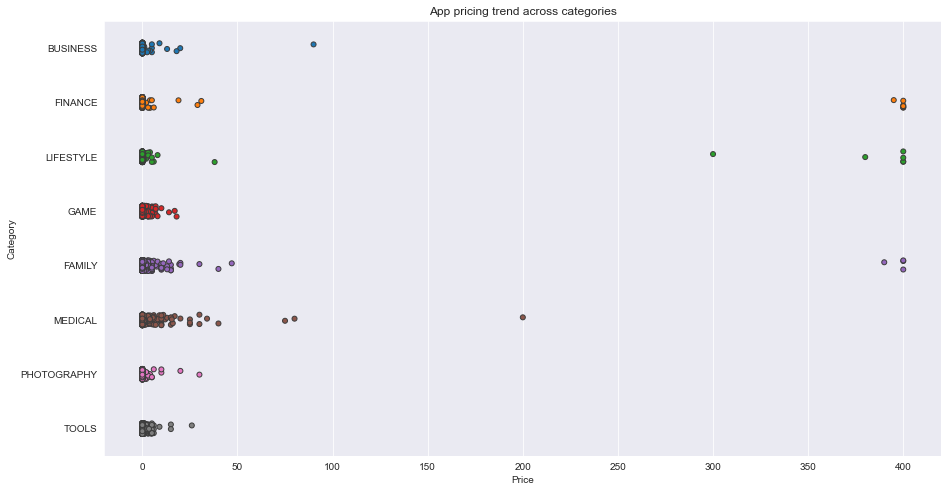

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# BirkaÃ§ popÃ¼ler uygulama kategorisi seÃ§
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Price vs Category yaparak fiyat trendini incele
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps["Price"] > 200]
apps_above_200[['Category', 'App', 'Price']]

# 8. "Ã–nemsiz" uygulamalarÄ± filtreleme
* PahalÄ± uygulamalarÄ±n bir Ã§oÄŸu "Ã¶nemsiz"dir. Bu tÃ¼r uygulamalarÄ±n bir amacÄ± yoktur ve yalnÄ±zca ÅŸaka yapmak iÃ§in geliÅŸtirilmiÅŸtir. BazÄ± geliÅŸtiriciler bunu kÃ¶tÃ¼ niyetle de yapabilir.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

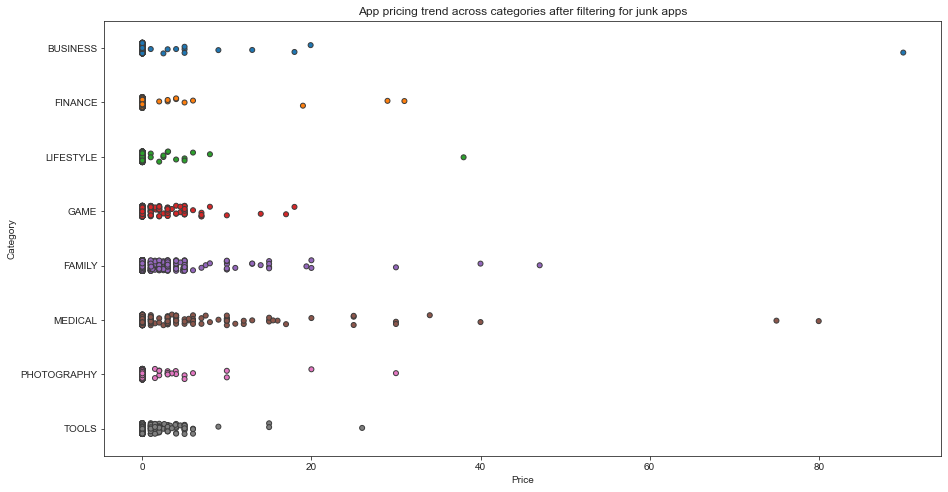

In [37]:
# 100 dolarÄ±n altÄ±nda fiyatlandÄ±rÄ±lmÄ±ÅŸ uygulamalarÄ± seÃ§
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = "Price", y = "Category", data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

# 9. Ãœcretli ve Ã¼cretsiz uygulamalarÄ±n popÃ¼lerliÄŸi
* Play Store'daki uygulamalar iÃ§in beÅŸ tÃ¼r fiyatlandÄ±rma stratejisi vardÄ±r; free, freemium, paid, paymium and subscription. Sadece free ve paid uygulamalara odaklanalÄ±m.
* Ãœcretsiz uygulamalarÄ±n bazÄ± Ã¶zellikleri;
    * Ä°ndirmek iÃ§in Ã¼cretsiz.
    * Ana gelir kaynaÄŸÄ± genellikle reklamlardan gelir.
    * Genellikle baÅŸka Ã¼rÃ¼nleri olan ÅŸirketler tarafÄ±ndan oluÅŸturulur ve uygulama bu Ã¼rÃ¼nlerin bir uzantÄ±sÄ± olarak devam eder.
    * MÃ¼ÅŸteriyi elde tutma, iletiÅŸim ve mÃ¼ÅŸteri hizmetleri iÃ§in bir araÃ§ olarak hizmet edebilir.
* Ãœcretli uygulamalarÄ±n bazÄ± Ã¶zellikleri;
    * UygulamanÄ±n indirilmesi ve kullanÄ±lmasÄ± iÃ§in kullanÄ±cÄ±lardan bir kez Ã¶deme yapmalarÄ± istenir.
    * KullanÄ±cÄ± satÄ±n almadan Ã¶nce uygulama hakkÄ±nda gerÃ§ekten bir fikir edinemez.
* Ãœcretli uygulamalar, Ã¼cretsiz uygulamalar kadar yÃ¼klenir mi? Fark beklediÄŸimiz kadar kesin olmasa da Ã¼cretli uygulamalar Ã¼cretsizlere gÃ¶re daha az yÃ¼kleme sayÄ±sÄ±na sahiptir.

In [31]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

# 10. KullanÄ±cÄ± Ä°ncelemelerinin Duygu Analizi
* Ä°nsanlarÄ±n Ã¼rÃ¼nÃ¼n, markan veya hizmetin hakkÄ±nda nasÄ±l hissetiÄŸini belirlemek iÃ§in kullanÄ±cÄ± inceleme verilerinin madenciliÄŸi, duyarlÄ±lÄ±k analizi adÄ± verilen bir teknik kullanÄ±larak yapÄ±labilir.
* Uygulamalar iÃ§in yapÄ±lan kullaÄ±nÄ±cÄ± yorumlarÄ±, o uygulamayla ilgili ruh halinin olumlu, olumsuz veya tarafsÄ±z olup olmadÄ±ÄŸÄ±nÄ± belirlemek iÃ§in analiz edilebilir. 
* Olumlu kelimelere "harika", "arkadaÅŸ canlÄ±sÄ±", "iyi" gibi kelimeler Ã¶rnek verilebilir.
* Olumsuz kelimelere "kÃ¶tÃ¼", "sorun", "yetersiz" gibi kelimeler Ã¶rnek verilebilir.
* GrafiÄŸe gÃ¶re Ã¼cretsiz uygulamalarÄ±n Ã§ok sayÄ±da sert yorum aldÄ±ÄŸÄ± gÃ¶rÃ¼lÃ¼r. Ãœcretli uygulamalar iÃ§in yapÄ±lan incelemeler aÅŸÄ±rÄ± olmumsuz gÃ¶rÃ¼nmÃ¼yor. Bu uygulamalarÄ±n kalite farkÄ±nÄ± ortaya koyabilir. Ãœcretli uygulamalar daha kalitelidir.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

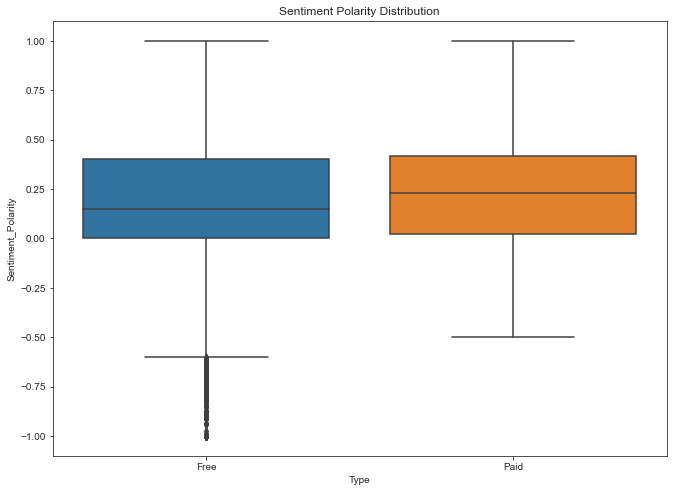

In [34]:
# user_reviews.csv okuma
reviews_df = pd.read_csv("datasets/user_reviews.csv")

# Join the two dataframes
merged_df = apps.merge(reviews_df)

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')